# sklearn - feature scaling

- Normalization
- Standardization (StandardScaler, MinMaxScaler)

In [30]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

abaloneFile = "./dataset/abalone.parquet"
abaloneStandardizedMinMaxFile =  "./dataset/abaloneStandardizedMinMax.parquet"
abaloneStandardizedFile =  "./dataset/abaloneStandardized.parquet"
abaloneNormalizedFile =  "./dataset/abaloneNormalized.parquet"

In [7]:
dfAbalone = pd.read_parquet(abaloneFile)

print(dfAbalone.head())

   length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.435     0.335   0.110         0.334          0.1355          0.0775   
1   0.585     0.450   0.125         0.874          0.3545          0.2075   
2   0.655     0.510   0.160         1.092          0.3960          0.2825   
3   0.545     0.425   0.125         0.768          0.2940          0.1495   
4   0.545     0.420   0.130         0.879          0.3740          0.1695   

   shell_weight  age  
0        0.0965    7  
1        0.2250    6  
2        0.3700   14  
3        0.2600   16  
4        0.2300   13  


## standardization

In [69]:
# standard scaler
# μ = 0, σ = 1

scaler = preprocessing.StandardScaler().fit_transform(X=dfAbalone)        #standardize variance (z-score)
dfAbaloneStandardized = pd.DataFrame(scaler, 
                                     columns= dfAbalone.columns)  # (μ=0, σ=1)

print(dfAbaloneStandardized.describe())

             length      diameter        height  whole_weight  shucked_weight  \
count  3.320000e+03  3.320000e+03  3.320000e+03  3.320000e+03    3.320000e+03   
mean   2.776895e-16  4.654911e-17  2.504021e-16 -2.814348e-16    2.182993e-16   
std    1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00    1.000151e+00   
min   -3.695497e+00 -3.512070e+00 -3.261480e+00 -1.675262e+00   -1.605405e+00   
25%   -6.000452e-01 -6.151080e-01 -5.683854e-01 -7.907822e-01   -7.930368e-01   
50%    1.428632e-01  1.840540e-01  1.706990e-02 -6.003667e-02   -9.993561e-02   
75%    7.619535e-01  7.334779e-01  6.025252e-01  6.623095e-01    6.606755e-01   
max    2.412861e+00  2.431697e+00  2.320110e+01  4.073983e+00    5.087072e+00   

       viscera_weight  shell_weight           age  
count    3.320000e+03  3.320000e+03  3.320000e+03  
mean     1.771006e-16 -1.054043e-16 -2.204395e-16  
std      1.000151e+00  1.000151e+00  1.000151e+00  
min     -1.630840e+00 -1.685830e+00 -2.775823e+00  
25%     -8

In [70]:
# Standard scaler - min-max
# min=0, max=1

min_max_scaler = preprocessing.MinMaxScaler().fit_transform(X=dfAbalone)                 # standardize to a range
dfAbaloneStandardizedMinMax = pd.DataFrame(min_max_scaler, columns= dfAbalone.columns)   # (min=0, max=1)

print(dfAbaloneStandardizedMinMax.describe())

            length     diameter       height  whole_weight  shucked_weight  \
count  3320.000000  3320.000000  3320.000000   3320.000000     3320.000000   
mean      0.604990     0.590883     0.123249      0.291388        0.239882   
std       0.163735     0.168269     0.037795      0.173962        0.149444   
min       0.000000     0.000000     0.000000      0.000000        0.000000   
25%       0.506757     0.487395     0.101770      0.153843        0.121385   
50%       0.628378     0.621849     0.123894      0.280946        0.224950   
75%       0.729730     0.714286     0.146018      0.406588        0.338601   
max       1.000000     1.000000     1.000000      1.000000        1.000000   

       viscera_weight  shell_weight          age  
count     3320.000000   3320.000000  3320.000000  
mean         0.236553      0.235596     0.342192  
std          0.145071      0.139772     0.123294  
min          0.000000      0.000000     0.000000  
25%          0.120474      0.125436     0.

<Axes: xlabel='age', ylabel='Count'>

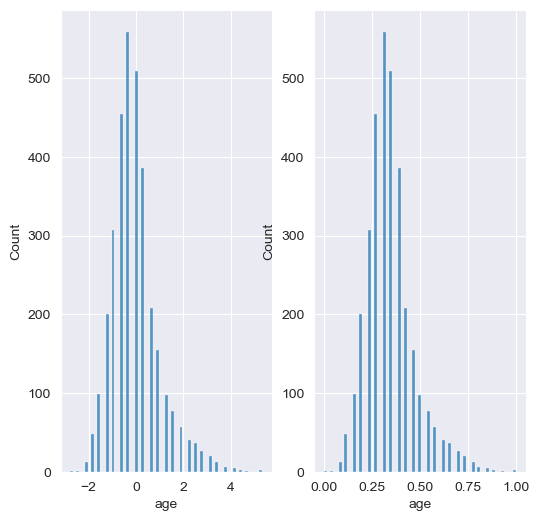

In [71]:
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))

sns.histplot(data= dfAbaloneStandardized.age, ax= ax[0])
sns.histplot(data= dfAbaloneStandardizedMinMax.age, ax= ax[1])

## normalization

In [26]:
#  normalization

normalizer = preprocessing.normalize(X=dfAbalone, norm="l1")

dfAbaloneNormalized = pd.DataFrame(normalizer,
                                   columns=dfAbalone.columns)

print(dfAbaloneNormalized.describe())

            length     diameter       height  whole_weight  shucked_weight  \
count  3320.000000  3320.000000  3320.000000   3320.000000     3320.000000   
mean      0.043202     0.033417     0.011356      0.061559        0.026983   
std       0.007761     0.005856     0.002627      0.028196        0.013696   
min       0.017635     0.014891     0.000000      0.001747        0.000873   
25%       0.038537     0.029771     0.010061      0.040354        0.016277   
50%       0.044165     0.034198     0.011444      0.060589        0.025752   
75%       0.048428     0.037554     0.012658      0.081745        0.036961   
max       0.070623     0.052967     0.101660      0.154037        0.083340   

       viscera_weight  shell_weight          age  
count     3320.000000   3320.000000  3320.000000  
mean         0.013469      0.017670     0.792345  
std          0.006509      0.007567     0.061367  
min          0.000109      0.000817     0.594864  
25%          0.008623      0.012170     0.

<Axes: xlabel='age', ylabel='Count'>

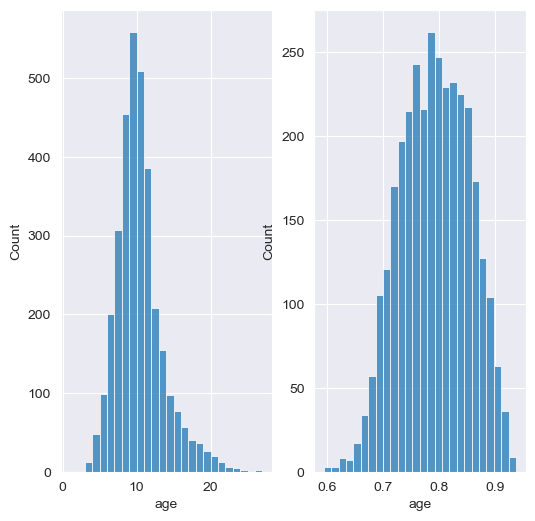

In [41]:
#

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))

sns.histplot(data=dfAbalone.age, ax = ax[0], bins=26)
sns.histplot(data=dfAbaloneNormalized.age, ax = ax[1], bins=26)

In [43]:
# save to files

dfAbaloneStandardizedMinMax.to_parquet(abaloneStandardizedMinMaxFile)
dfAbaloneStandardized.to_parquet(abaloneStandardizedFile)
dfAbaloneNormalized.to_parquet(abaloneNormalizedFile)